<a href="https://colab.research.google.com/github/juharrais/FIESC/blob/main/Questao2(a)_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montar o Google Drive no Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Instalação do OpenCV
!pip install opencv-python

# Pré-Processamento
As imagens de satélite estão muito pixeladas, o pré-processamento é essencial para melhorar a qualidade da imagem e facilitar a segmentação dos silos.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Diretório no qual suas imagens estão armazenadas
image_directory = '/content/drive/MyDrive/FIESC_Prova/Questão2/a'

# Nomes das imagens
image_names = ['img46.png',
               'img47.png',
               'img66.png',
               'img67.png']

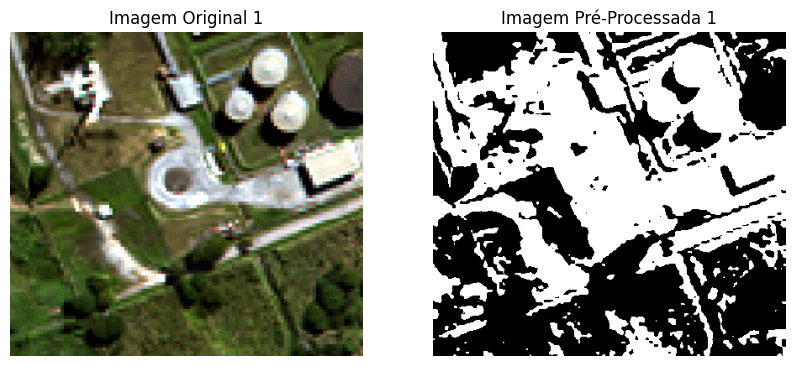

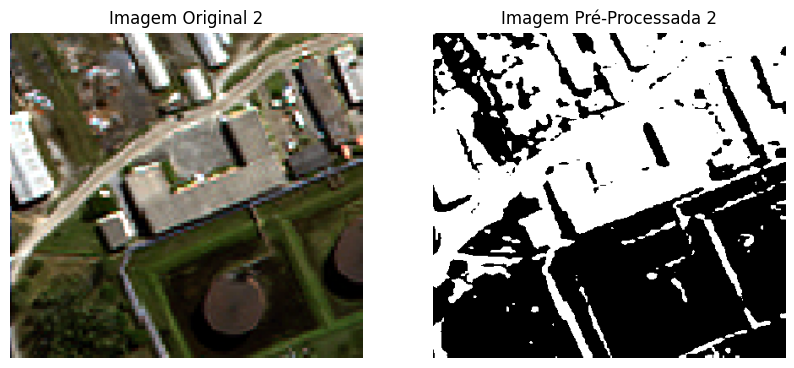

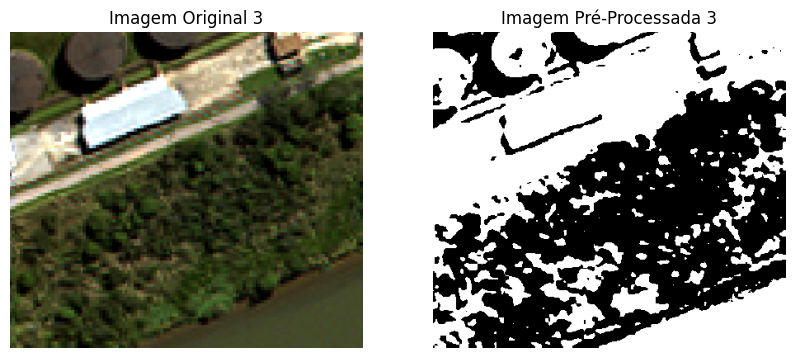

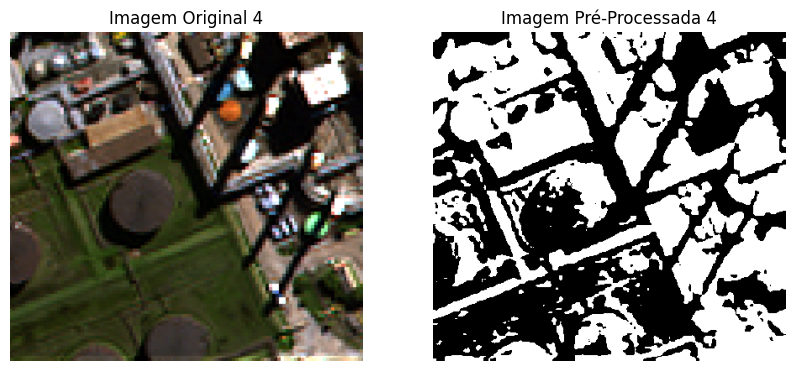

In [ ]:
# Carregue e pré-processe cada uma das 4 imagens
for i, image_name in enumerate(image_names, start=1):
    # Caminho completo da imagem
    image_path = os.path.join(image_directory, image_name)

    # Carregue a imagem original
    original_image = cv2.imread(image_path)

    if original_image is not None:
        # Plote a imagem original
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Imagem Original {i}')
        plt.axis('off')  # Desativa os eixos

        # Redimensione a imagem
        new_width = 2 * original_image.shape[1]
        new_height = 2 * original_image.shape[0]
        resized_image = cv2.resize(original_image, (new_width, new_height))

        # Aplique um filtro de média para reduzir o ruído
        blurred_image = cv2.blur(resized_image, (3, 3))

        # Equalize o histograma de intensidades para melhorar o contraste
        gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
        equalized_image = cv2.equalizeHist(gray_image)

        # Limiarização
        threshold_value = 128  # Ajuste o valor de limiarização conforme necessário
        _, binary_image = cv2.threshold(equalized_image, threshold_value, 255, cv2.THRESH_BINARY)

        # Plote a imagem pré-processada
        plt.subplot(1, 2, 2)
        plt.imshow(binary_image, cmap='gray')
        plt.title(f'Imagem Pré-Processada {i}')
        plt.axis('off')  # Desativa os eixos

        plt.show()
    else:
        print(f'Erro: Não foi possível carregar a imagem {image_name}')


# Segmentação por contornos

In [ ]:
# Função para segmentar os silos em uma imagem
def segment_silos(image):
    #Transformação morfológica para remover pequenos ruídos e conectar objetos próximos
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    #Contornos dos objetos na imagem
    contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtre os contornos com base na área (ajuste o valor conforme necessário)
    min_contour_area = 500
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

    # Desenhe os contornos dos silos na imagem original
    result_image = image.copy()
    cv2.drawContours(result_image, filtered_contours, -1, (0, 255, 0), 2)
    return result_image


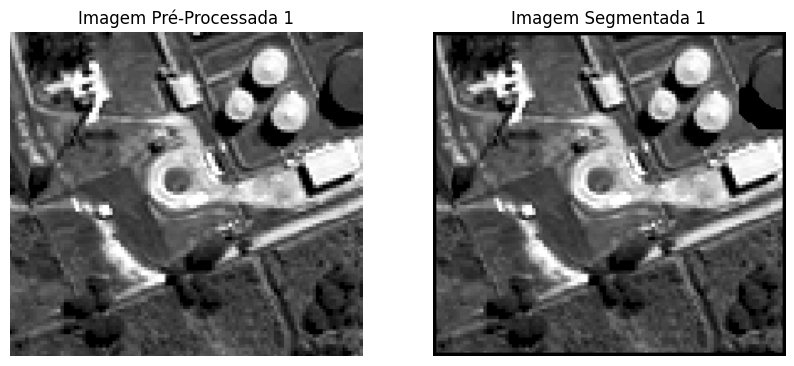

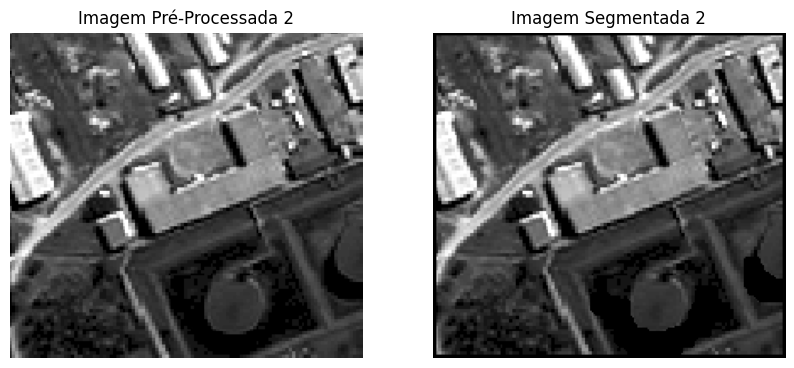

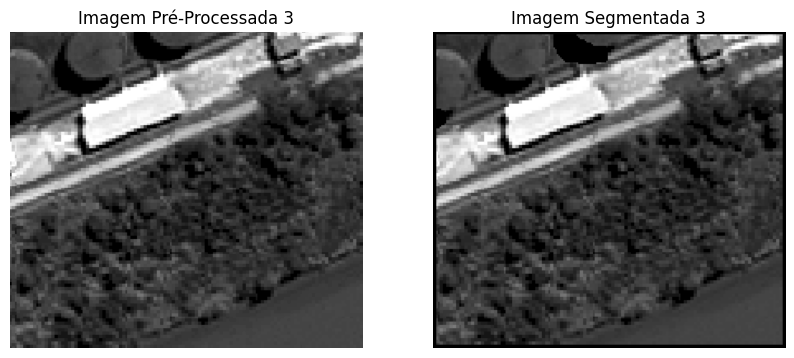

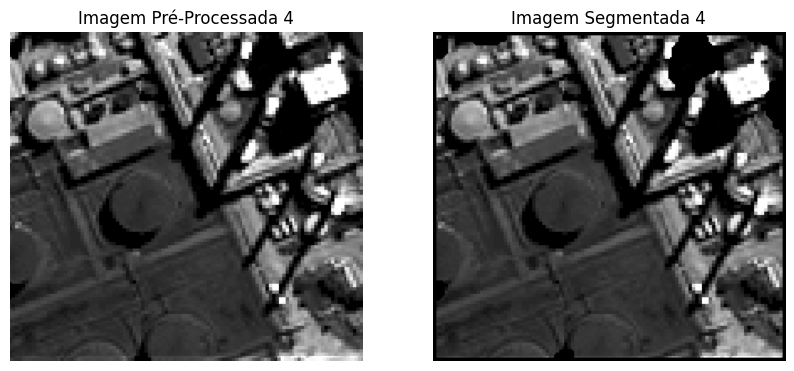

In [ ]:
# Carregue e processe cada uma das 4 imagens
for i, image_name in enumerate(image_names, start=1):
    # Caminho completo da imagem
    image_path = os.path.join(image_directory, image_name)

    # Carregue a imagem pré-processada
    preprocessed_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if preprocessed_image is not None:
        # Plote a imagem pré-processada
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(preprocessed_image, cmap='gray')
        plt.title(f'Imagem Pré-Processada {i}')
        plt.axis('off')  # Desativa os eixos

        # Realize a segmentação dos silos
        segmented_image = segment_silos(preprocessed_image)

        # Plote a imagem segmentada
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Imagem Segmentada {i}')
        plt.axis('off')  # Desativa os eixos

        plt.show()
    else:
        print(f'Erro: Não foi possível carregar a imagem {image_name}')
